In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
# CSV - modified to rename columns
data = pd.read_csv('resources/data_modified.csv')

# Remove un-needed columns
data = data.drop(columns=['gameNum','player', 'points','me','2','3','4','5','6','7','8','9','10','11','12',\
                          'production','tradeGain','robberCardsGain','totalGain','tradeLoss',\
                          'robberCardsLoss','tribute','totalLoss','totalAvailable',"1_1_N",	"1_2_N",	"1_3_N",	"2_1_N",	"2_2_N",	"2_3_N"
])

# Pandas dummies convert to categorical
data = pd.get_dummies(data)

# Create list of column names
columns = []
for ea in data.columns:
    columns.append(ea)
# Pop 0th
columns.pop(0)

'points'

In [15]:
data

,points,1_1_P,1_2_P,1_3_P,2_1_P,2_2_P,2_3_P,1_1_R_C,1_1_R_L,1_1_R_O,...,2_3_R_2S,2_3_R_2W,2_3_R_3G,2_3_R_B,2_3_R_C,2_3_R_D,2_3_R_L,2_3_R_O,2_3_R_S,2_3_R_W
0,5,5,2,2,4,3,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,9,4,5,3,3,4,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,10,4,5,1,5,3,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,5,5,4,2,3,5,3,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,10,5,4,3,5,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5,5,3,2,3,4,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
196,5,5,4,3,4,5,2,0,0,1,...,0,0,0,0,1,0,0,0,0,0
197,10,5,3,2,3,4,2,0,1,0,...,0,0,0,0,1,0,0,0,0,0
198,4,4,5,3,4,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [17]:
# Assign X (data) and y (target)
X = data[columns]
y = data['points']#.values.reshape(-1,1)
print(X.shape, y.shape)

(200, 50) (200,)


In [18]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X, y)
rf.score(X,y)

1.0

In [19]:
importances = rf.feature_importances_
importances

array([0.0419373 , 0.05360133, 0.04604895, 0.0484506 , 0.06227109,
       0.04749406, 0.02051335, 0.02311781, 0.02485184, 0.02243684,
       0.0192723 , 0.02112605, 0.02125394, 0.02417254, 0.02058057,
       0.02450539, 0.00109633, 0.00294984, 0.00102444, 0.00303345,
       0.01689237, 0.00463113, 0.01563567, 0.02233048, 0.02190162,
       0.0249389 , 0.02285301, 0.02351169, 0.01477316, 0.02164065,
       0.02303231, 0.0019572 , 0.02179435, 0.02143954, 0.01955509,
       0.0241133 , 0.02534605, 0.00482732, 0.00316094, 0.00537234,
       0.0044471 , 0.0036085 , 0.00689143, 0.00192017, 0.02172225,
       0.00663166, 0.02270158, 0.02138091, 0.02553431, 0.01571694])

In [20]:
sorted(zip(rf.feature_importances_, X), reverse=True)

[(0.062271086704866946, '2_2_P'),
 (0.053601329720567976, '1_2_P'),
 (0.04845059953359512, '2_1_P'),
 (0.04749406326912346, '2_3_P'),
 (0.046048951059228044, '1_3_P'),
 (0.04193729628963307, '1_1_P'),
 (0.025534310230896775, '2_3_R_S'),
 (0.02534605301555131, '2_2_R_W'),
 (0.024938895761559155, '1_3_R_W'),
 (0.024851842556347033, '1_1_R_O'),
 (0.02450539043491169, '1_2_R_W'),
 (0.024172538467085766, '1_2_R_O'),
 (0.024113300101201874, '2_2_R_S'),
 (0.023511686364199792, '2_1_R_L'),
 (0.02311780838519146, '1_1_R_L'),
 (0.023032312089845963, '2_1_R_W'),
 (0.02285300967288457, '2_1_R_C'),
 (0.022701576061285172, '2_3_R_L'),
 (0.022436841347542917, '1_1_R_S'),
 (0.022330478972018935, '1_3_R_O'),
 (0.02190162391594929, '1_3_R_S'),
 (0.02179435201908794, '2_2_R_C'),
 (0.02172224764132315, '2_3_R_C'),
 (0.021640649099532994, '2_1_R_S'),
 (0.021439536458330414, '2_2_R_L'),
 (0.021380913936183167, '2_3_R_O'),
 (0.021253938701782518, '1_2_R_L'),
 (0.021126046720641972, '1_2_R_C'),
 (0.0205805711

In [17]:
# Assign X (data) and y (target)
X = data[columns]
y = data['win'].values.reshape(-1,1)
print(X.shape, y.shape)

(200, 50) (200, 1)


In [18]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [19]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [20]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [21]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=2, activation='softmax'))

### END SOLUTION

In [22]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

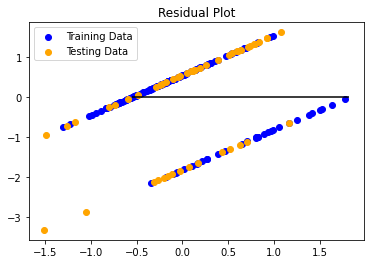

In [23]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [24]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.697375042753005, R2: -0.4459120734562636


In [25]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.5358816596894118, R2: -0.3083436360317213


In [26]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.5358816596894118, R2: -0.3083436360317213


In [27]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.5870901938965347, R2: -0.35196572072667776


In [28]:
########################
# GridSearch Estimator #
########################

In [29]:
data

,win,1_1_P,1_2_P,1_3_P,2_1_P,2_2_P,2_3_P,1_1_R_C,1_1_R_L,1_1_R_O,...,2_3_R_2S,2_3_R_2W,2_3_R_3G,2_3_R_B,2_3_R_C,2_3_R_D,2_3_R_L,2_3_R_O,2_3_R_S,2_3_R_W
0,0,5,2,2,4,3,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,4,5,3,3,4,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,4,5,1,5,3,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,5,4,2,3,5,3,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,5,4,3,5,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,5,3,2,3,4,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
196,0,5,4,3,4,5,2,0,0,1,...,0,0,0,0,1,0,0,0,0,0
197,1,5,3,2,3,4,2,0,1,0,...,0,0,0,0,1,0,0,0,0,0
198,0,4,5,3,4,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
data[]

SyntaxError: invalid syntax (<ipython-input-30-1527323af517>, line 1)